# Decision Tree For Regression

In this notebook, we present how decision trees are working in regression problems. We show differences with the decision tree previously presented in a classification setting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguins = pd.read_csv('data/penguins_regression.csv')
data_columns = ['Flipper Length (mm)']
target_column = 'Body Mass (g)'

data_train, target_train = penguins[data_columns], penguins[target_column]

To illustrate how decision trees are predicting in a regression setting, we will create a synthetic dataset containing all possible flipper length  from the minimum to the maximum of the original data.

In [4]:
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

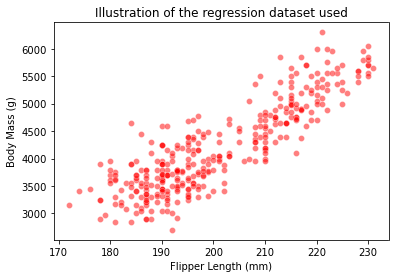

In [9]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color='red', alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

We will first illustrate the difference between a linear model and a decision tree.

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

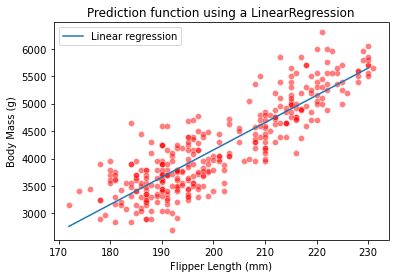

In [11]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="red", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

On the plot above, we see that a non-regularized `LinearRegression` is able to fit the data. A feature of this model is that all new predictions will be on the line.

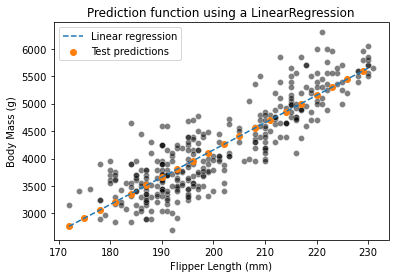

In [12]:
ax = sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                     color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Test predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

Contrary to linear models, decision trees are non-parametric models: they do not make assumptions about the way data is distributed. This will affect the prediction scheme. Repeating the above experiment will highlight the differences.